In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.linalg
%matplotlib inline

In [2]:
xs = np.array([10,14,18,22,26,30,34,38,42,46])
a = np.vstack([xs, np.ones(len(xs))]).T
ys = np.array([44.20, 61.7, 78.29, 94.56, 111.47, 128.27, 145.11, 162.71, 180.35, 198.62])

In [3]:
k, c = numpy.linalg.lstsq(a, ys, rcond=None)[0]

xs_approx = np.linspace(min(xs), max(xs))
ys_approx = k * xs_approx + c

In [4]:
mean_y = sum(ys) / len(ys)
mean_x = sum(xs) / len(xs)
mean_xy = sum(xs * ys) / len(xs)
mean_x_squared = sum(xs**2) / len(xs)
mean_y_squared = sum(ys**2) / len(xs)

k = (mean_xy - mean_x * mean_y) / (mean_x_squared - mean_x**2)
c = mean_y - k * mean_x;

k_sigma = (((mean_y_squared - mean_y ** 2) / (mean_x_squared - mean_x ** 2) - k**2) / len(xs))**0.5
c_sigma = k_sigma * (mean_x_squared - mean_x ** 2)

y_sigma_syst = 2 * 0.5 / (max(xs) - min(xs))
y_sigma = ((sum((k * xs + c - ys)**2) / len(ys))**2 + y_sigma_syst**2)**0.5

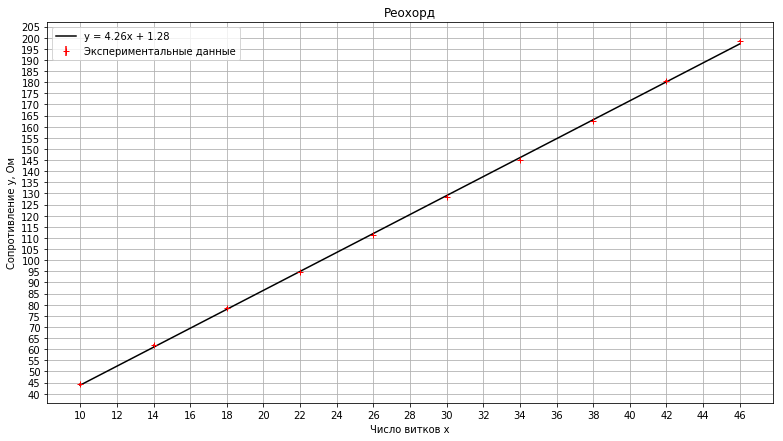

In [5]:
plt.gcf().set_size_inches(13, 7)
axes = plt.axes()
axes.set_title("Реохорд")
axes.set_xlabel("Число витков x")
axes.set_ylabel("Сопротивление y, Ом")
plt.locator_params(nbins=20, axis='x')
plt.locator_params(nbins=40, axis='y')
plt.grid(True)
plt.plot(xs_approx, ys_approx, 'k-')
plt.errorbar(xs, ys, y_sigma, fmt='r+')
plt.legend(["y = {k:.2f}x + {c:.2f}".format(k=k, c=c), "Экспериментальные данные"]);

In [6]:
U = k * 0.16 / (4 * 160) * 1000
sigma = U / 100 * ((k_sigma/k)**2 + (0.01/0.4)**2 + (1/160)**2)**0.5 * 1000
print('Удельное сопротивление: {:.2f}±{:.2f} Ом·м'.format(U, sigma))

Удельное сопротивление: 1.06±0.28 Ом·м
